In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import math

In [2]:
df = pd.read_csv('Bengali_Banglish_80K_Dataset.csv')

In [3]:
df.head

<bound method NDFrame.head of                                                  Bengali     Label  \
0      এখানে কাওকে কবর দিয়ো না তাহলে তোমাদের পরিবারের...      fear   
1      কিন্ত ভয় কিসের থেকে আমি জানতামনা কিন্ত আমার মন...      fear   
2      করোনাভাইরাস থেকে সৃষ্ট রোগ কভিড১৯ বিশ্বব্যাপী ...      fear   
3      চিতাও তার দিকে এগোতে সাহস পাচ্ছে না দুদিনের অন...      fear   
4      রানী মেরি টিউডরের প্রেতাত্মা এটাআজ চেষ্টা করলা...      fear   
...                                                  ...       ...   
80093  কী ম্যাচিউর একটা কাজ! আশফাক নিপুনরা আছে বলেই এ...   disgust   
80094  সত্যটা কি সেটা আসলে জান্তে পারলাম না । আর পুরা...  surprise   
80095  এভাবেই পুরুষেরা পার পেয়ে যায়।কিন্তু তাদের চোখে...  surprise   
80096  যদিও আফরান নিশু বস আছে বসের নাটক বাদ দেয় না তা...   disgust   
80097  নাটক বলে এগুলা কে রহস্য মুভির স্বাদ পেলাম আর অ...  surprise   

                                                Banglish  
0      ekhane kaoke kobor diyo na tahole tomader pori...  
1      kint

In [4]:
df.groupby("Label").describe()

Bengali                                                            \
           count unique                                                top   
Label                                                                        
anger      15180  15180  নিউ মার্কেট সংঘর্ষের ঘটনাটিকেও রাজনৈতিক রুপ দে...   
disgust    13099  13099                এই ভাবেই আইনের শাষন প্রতিষ্ঠা করেন?   
fear        7565   7565  এখানে কাওকে কবর দিয়ো না তাহলে তোমাদের পরিবারের...   
joy        17837  17837  হা হা হা হো হো হো হি হি হি পালাবি কোথায় রে কালিয়া   
sadness    16310  16310                                       আখেরি জামানা   
surprise   10107  10107                                              কেমনে   

              Banglish         \
         freq    count unique   
Label                           
anger       1    15179  15108   
disgust     1    13098  13051   
fear        1     7565   6997   
joy         1    17836  17779   
sadness     1    16309  16252   
surprise    1    10107  10076   

                                                                  
                                                        top freq  
Label                                                             
anger                                       batil kora ucit    3  
disgust   kotto boro cor... 15/20 bochor dhore je jontro...    2  
fear      ekhane kaoke kobor diyo na tahole tomader pori...    2  
joy                                     ek kothay osadharon    4  
sadness   konodol somarthonkari bjakti sorbojon shrodhdh...    2  
surprise  bangla o hindi coloccitre jemon chilen oprihar...    2

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.preprocessing import LabelBinarizer

In [6]:
count_vect = CountVectorizer() # for converting text into count-based vectors
tfidf_transformer = TfidfTransformer() # for converting text into tf-idf-based vectors
lb = LabelBinarizer() # object for making class-labels into binary numbers

In [7]:
df.columns

Index(['Bengali', 'Label', 'Banglish'], dtype='object')

In [8]:
df.head

<bound method NDFrame.head of                                                  Bengali     Label  \
0      এখানে কাওকে কবর দিয়ো না তাহলে তোমাদের পরিবারের...      fear   
1      কিন্ত ভয় কিসের থেকে আমি জানতামনা কিন্ত আমার মন...      fear   
2      করোনাভাইরাস থেকে সৃষ্ট রোগ কভিড১৯ বিশ্বব্যাপী ...      fear   
3      চিতাও তার দিকে এগোতে সাহস পাচ্ছে না দুদিনের অন...      fear   
4      রানী মেরি টিউডরের প্রেতাত্মা এটাআজ চেষ্টা করলা...      fear   
...                                                  ...       ...   
80093  কী ম্যাচিউর একটা কাজ! আশফাক নিপুনরা আছে বলেই এ...   disgust   
80094  সত্যটা কি সেটা আসলে জান্তে পারলাম না । আর পুরা...  surprise   
80095  এভাবেই পুরুষেরা পার পেয়ে যায়।কিন্তু তাদের চোখে...  surprise   
80096  যদিও আফরান নিশু বস আছে বসের নাটক বাদ দেয় না তা...   disgust   
80097  নাটক বলে এগুলা কে রহস্য মুভির স্বাদ পেলাম আর অ...  surprise   

                                                Banglish  
0      ekhane kaoke kobor diyo na tahole tomader pori...  
1      kint

In [9]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
df["classes_bin"] = lb_make.fit_transform(df["Label"])
df[["classes_bin", "Label"]].head(11)

,classes_bin,Label
0,2,fear
1,2,fear
2,2,fear
3,2,fear
4,2,fear
5,2,fear
6,2,fear
7,2,fear
8,2,fear
9,2,fear


In [10]:
df

,Bengali,Label,Banglish,classes_bin
0,এখানে কাওকে কবর দিয়ো না তাহলে তোমাদের পরিবারের...,fear,ekhane kaoke kobor diyo na tahole tomader pori...,2
1,কিন্ত ভয় কিসের থেকে আমি জানতামনা কিন্ত আমার মন...,fear,kinto voy kiser theke ami jantamna kinto amar ...,2
2,করোনাভাইরাস থেকে সৃষ্ট রোগ কভিড১৯ বিশ্বব্যাপী ...,fear,kronavairas theke srishto rog covid 19 bishbob...,2
3,চিতাও তার দিকে এগোতে সাহস পাচ্ছে না দুদিনের অন...,fear,citao tar dike egote sahosh pacche na dudiner ...,2
4,রানী মেরি টিউডরের প্রেতাত্মা এটাআজ চেষ্টা করলা...,fear,rani meri tiudrer pretatma etaaj ceshta korlam...,2
...,...,...,...,...
80093,কী ম্যাচিউর একটা কাজ! আশফাক নিপুনরা আছে বলেই এ...,disgust,ki mjaciur ekta kaj! ashfak nipunra ache bolei...,1
80094,সত্যটা কি সেটা আসলে জান্তে পারলাম না । আর পুরা...,surprise,sotjta ki sheta asle jante parlam na . ar pura...,5
80095,এভাবেই পুরুষেরা পার পেয়ে যায়।কিন্তু তাদের চোখে...,surprise,evabei purushera paro peye jay.kintu tader cok...,5
80096,যদিও আফরান নিশু বস আছে বসের নাটক বাদ দেয় না তা...,disgust,jdio afran nishu bos ache boser natok bad dey ...,1


In [11]:
df.isnull()

,Bengali,Label,Banglish,classes_bin
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
80093,False,False,False,False
80094,False,False,False,False
80095,False,False,False,False
80096,False,False,False,False


In [12]:
df.dropna(inplace=True)

In [13]:
df

,Bengali,Label,Banglish,classes_bin
0,এখানে কাওকে কবর দিয়ো না তাহলে তোমাদের পরিবারের...,fear,ekhane kaoke kobor diyo na tahole tomader pori...,2
1,কিন্ত ভয় কিসের থেকে আমি জানতামনা কিন্ত আমার মন...,fear,kinto voy kiser theke ami jantamna kinto amar ...,2
2,করোনাভাইরাস থেকে সৃষ্ট রোগ কভিড১৯ বিশ্বব্যাপী ...,fear,kronavairas theke srishto rog covid 19 bishbob...,2
3,চিতাও তার দিকে এগোতে সাহস পাচ্ছে না দুদিনের অন...,fear,citao tar dike egote sahosh pacche na dudiner ...,2
4,রানী মেরি টিউডরের প্রেতাত্মা এটাআজ চেষ্টা করলা...,fear,rani meri tiudrer pretatma etaaj ceshta korlam...,2
...,...,...,...,...
80093,কী ম্যাচিউর একটা কাজ! আশফাক নিপুনরা আছে বলেই এ...,disgust,ki mjaciur ekta kaj! ashfak nipunra ache bolei...,1
80094,সত্যটা কি সেটা আসলে জান্তে পারলাম না । আর পুরা...,surprise,sotjta ki sheta asle jante parlam na . ar pura...,5
80095,এভাবেই পুরুষেরা পার পেয়ে যায়।কিন্তু তাদের চোখে...,surprise,evabei purushera paro peye jay.kintu tader cok...,5
80096,যদিও আফরান নিশু বস আছে বসের নাটক বাদ দেয় না তা...,disgust,jdio afran nishu bos ache boser natok bad dey ...,1


In [14]:
text = df['Bengali'].values.tolist()

In [15]:
df.groupby("Label").describe()

classes_bin                                   
               count mean  std  min  25%  50%  75%  max
Label                                                  
anger        15179.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
disgust      13098.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0
fear          7565.0  2.0  0.0  2.0  2.0  2.0  2.0  2.0
joy          17836.0  3.0  0.0  3.0  3.0  3.0  3.0  3.0
sadness      16309.0  4.0  0.0  4.0  4.0  4.0  4.0  4.0
surprise     10107.0  5.0  0.0  5.0  5.0  5.0  5.0  5.0

In [16]:
df["Label"].value_counts()

joy         17836
sadness     16309
anger       15179
disgust     13098
surprise    10107
fear         7565
Name: Label, dtype: int64

In [17]:
df['Bengali'] = df['Bengali'].astype(str)

In [18]:
text = df["Bengali"]

In [19]:
train_counts = count_vect.fit_transform(text) # converting docs into vectors
train_tfidf  = train_counts 
train_tfidf = tfidf_transformer.fit_transform(train_counts) # converting transformed vectors into tf-idf vectors
train_tfidf.shape

(80094, 12803)

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(train_tfidf, df['classes_bin'], test_size=0.2, random_state=42)

Y_pre = df['Label']
target_names = list(set(Y_pre))

In [22]:
target_names

['surprise', 'joy', 'anger', 'sadness', 'disgust', 'fear']

In [23]:
X_train

<64075x12803 sparse matrix of type '<class 'numpy.float64'>'
	with 608792 stored elements in Compressed Sparse Row format>

In [24]:
y_train

2652     4
30303    4
4172     3
61031    4
63151    3
        ..
6266     3
54887    5
76824    1
860      2
15796    1
Name: classes_bin, Length: 64075, dtype: int32

In [25]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import RandomizedSearchCV 

In [26]:
import seaborn as sn

# Naive Bayes

In [27]:
from sklearn.naive_bayes import MultinomialNB

Test set accuracy 0.45202571945814346
              precision    recall  f1-score   support

    surprise       0.38      0.36      0.37      2965
         joy       0.43      0.38      0.41      2636
       anger       0.83      0.28      0.42      1479
     sadness       0.53      0.67      0.59      3636
     disgust       0.36      0.55      0.43      3253
        fear       0.74      0.25      0.37      2050

    accuracy                           0.45     16019
   macro avg       0.54      0.42      0.43     16019
weighted avg       0.50      0.45      0.44     16019



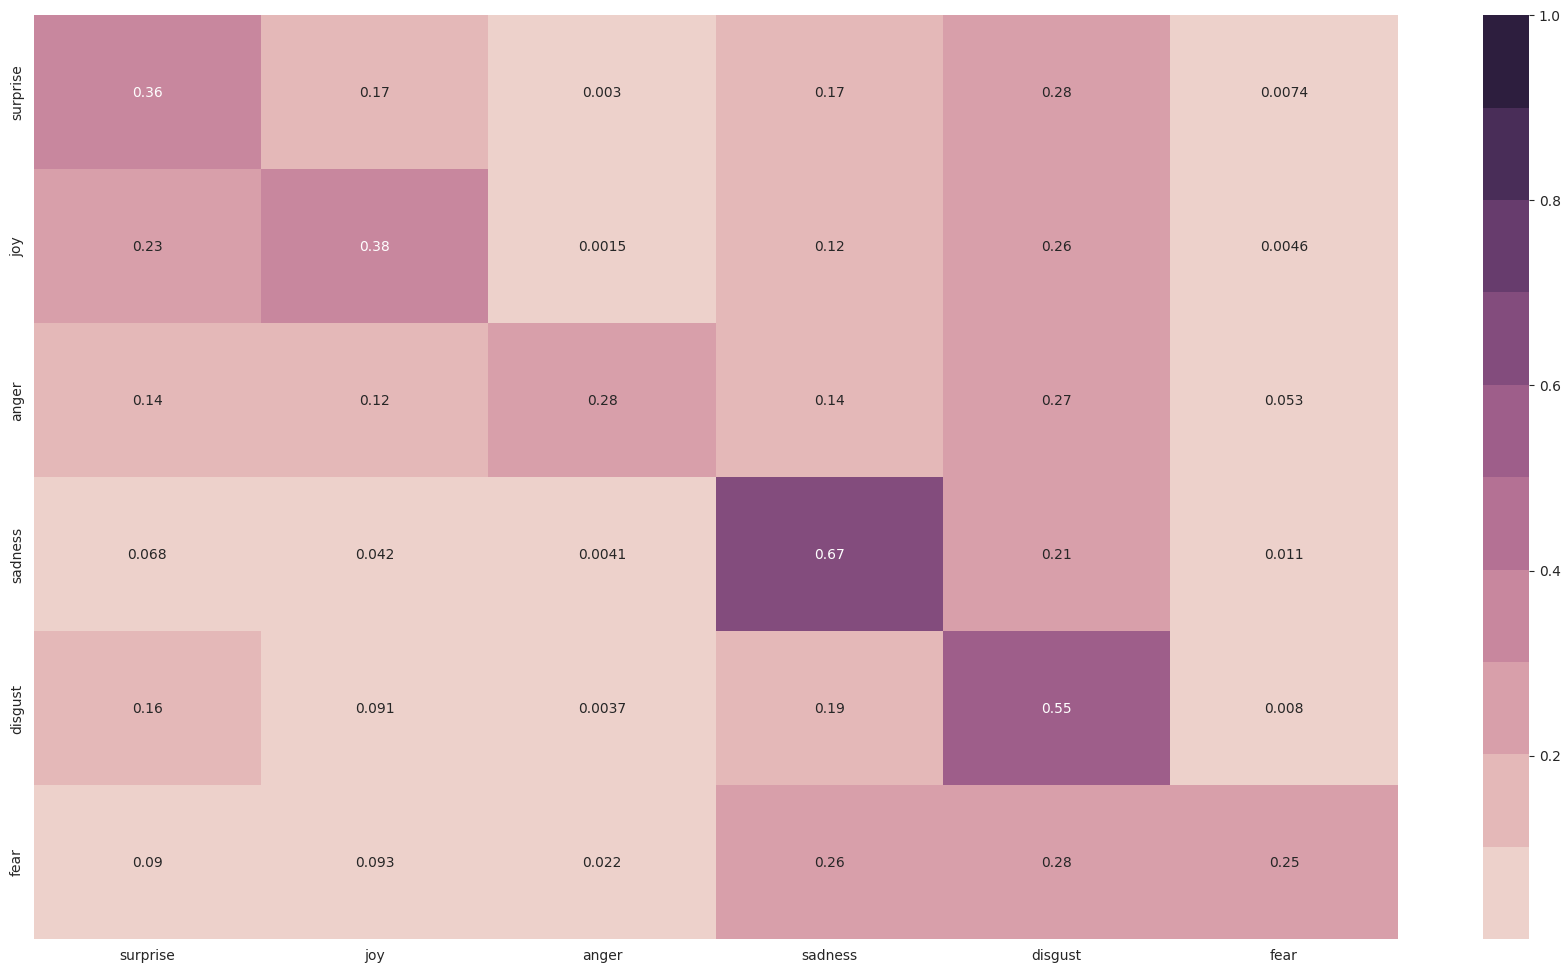

In [28]:
NBclassifer = MultinomialNB()
NBclassifer.fit(X_train, y_train)
y_pred = NBclassifer.predict(X_test)
print('Test set accuracy %s' % accuracy_score(y_test, y_pred))
cr = classification_report(y_test, y_pred, target_names=target_names)
print(cr)


# ------------------------------------------------------------------------------ #

cm = confusion_matrix(y_test, y_pred)
cm = (cm.T / cm.astype(float).sum(axis=1)).T

df_cm = pd.DataFrame(cm, range(len(target_names)), range(len(target_names)))
with sn.axes_style("white"):
    plt.figure(figsize = (22,12))
    ax = sn.heatmap(df_cm, annot=True, xticklabels=target_names, yticklabels=target_names, vmax=1,  cmap=sn.cubehelix_palette(10))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    fig = ax.get_figure()
  

# XGBoost

In [29]:
from xgboost import XGBClassifier

Test set accuracy 0.48292652475185716
              precision    recall  f1-score   support

    surprise       0.34      0.38      0.36      2965
         joy       0.45      0.47      0.46      2636
       anger       0.69      0.50      0.58      1479
     sadness       0.53      0.69      0.60      3636
     disgust       0.47      0.41      0.44      3253
        fear       0.59      0.38      0.46      2050

    accuracy                           0.48     16019
   macro avg       0.51      0.47      0.48     16019
weighted avg       0.49      0.48      0.48     16019



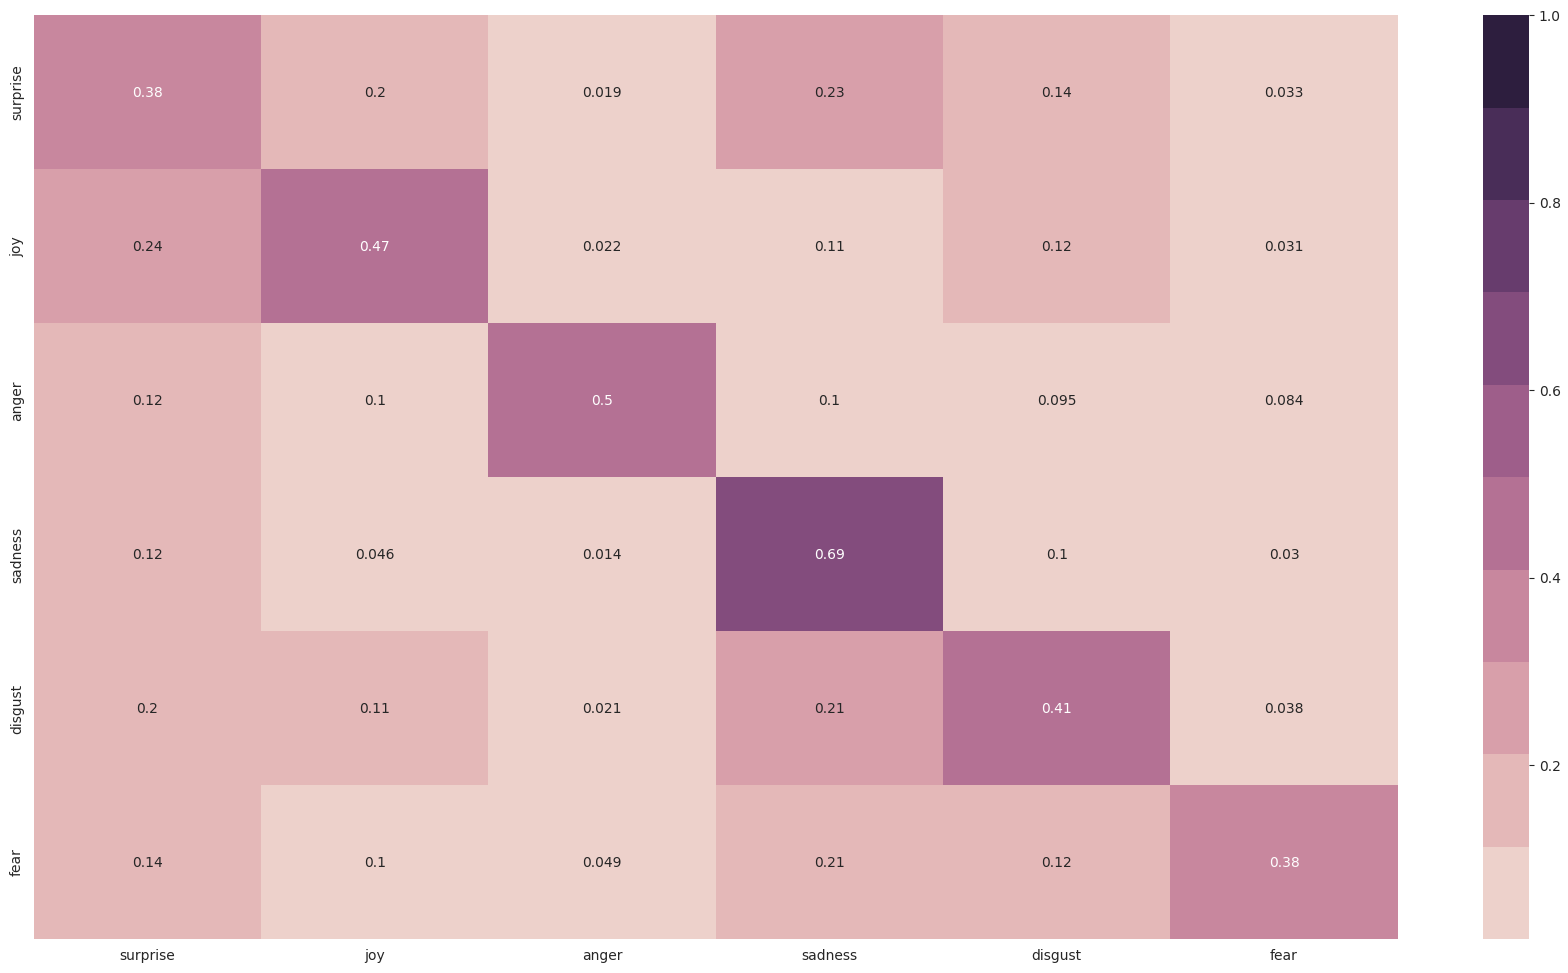

In [30]:
XGBclassifer = XGBClassifier()
XGBclassifer.fit(X_train, y_train)
y_pred = XGBclassifer.predict(X_test)
print('Test set accuracy %s' % accuracy_score(y_test, y_pred))
cr = classification_report(y_test, y_pred, target_names=target_names)
print(cr)

# ------------------------------------------------------------------------------ #

cm = confusion_matrix(y_test, y_pred)
cm = (cm.T / cm.astype(float).sum(axis=1)).T

df_cm = pd.DataFrame(cm, range(len(target_names)), range(len(target_names)))
with sn.axes_style("white"):
    plt.figure(figsize = (22,12))
    ax = sn.heatmap(df_cm, annot=True, xticklabels=target_names, yticklabels=target_names, vmax=1,  cmap=sn.cubehelix_palette(10))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    fig = ax.get_figure()


# Random Forest

In [31]:
from sklearn.ensemble import RandomForestClassifier

Test set accuracy 0.5003433422810413
              precision    recall  f1-score   support

    surprise       0.37      0.38      0.38      2965
         joy       0.45      0.46      0.45      2636
       anger       0.78      0.55      0.64      1479
     sadness       0.55      0.66      0.60      3636
     disgust       0.45      0.48      0.46      3253
        fear       0.66      0.44      0.52      2050

    accuracy                           0.50     16019
   macro avg       0.54      0.49      0.51     16019
weighted avg       0.51      0.50      0.50     16019



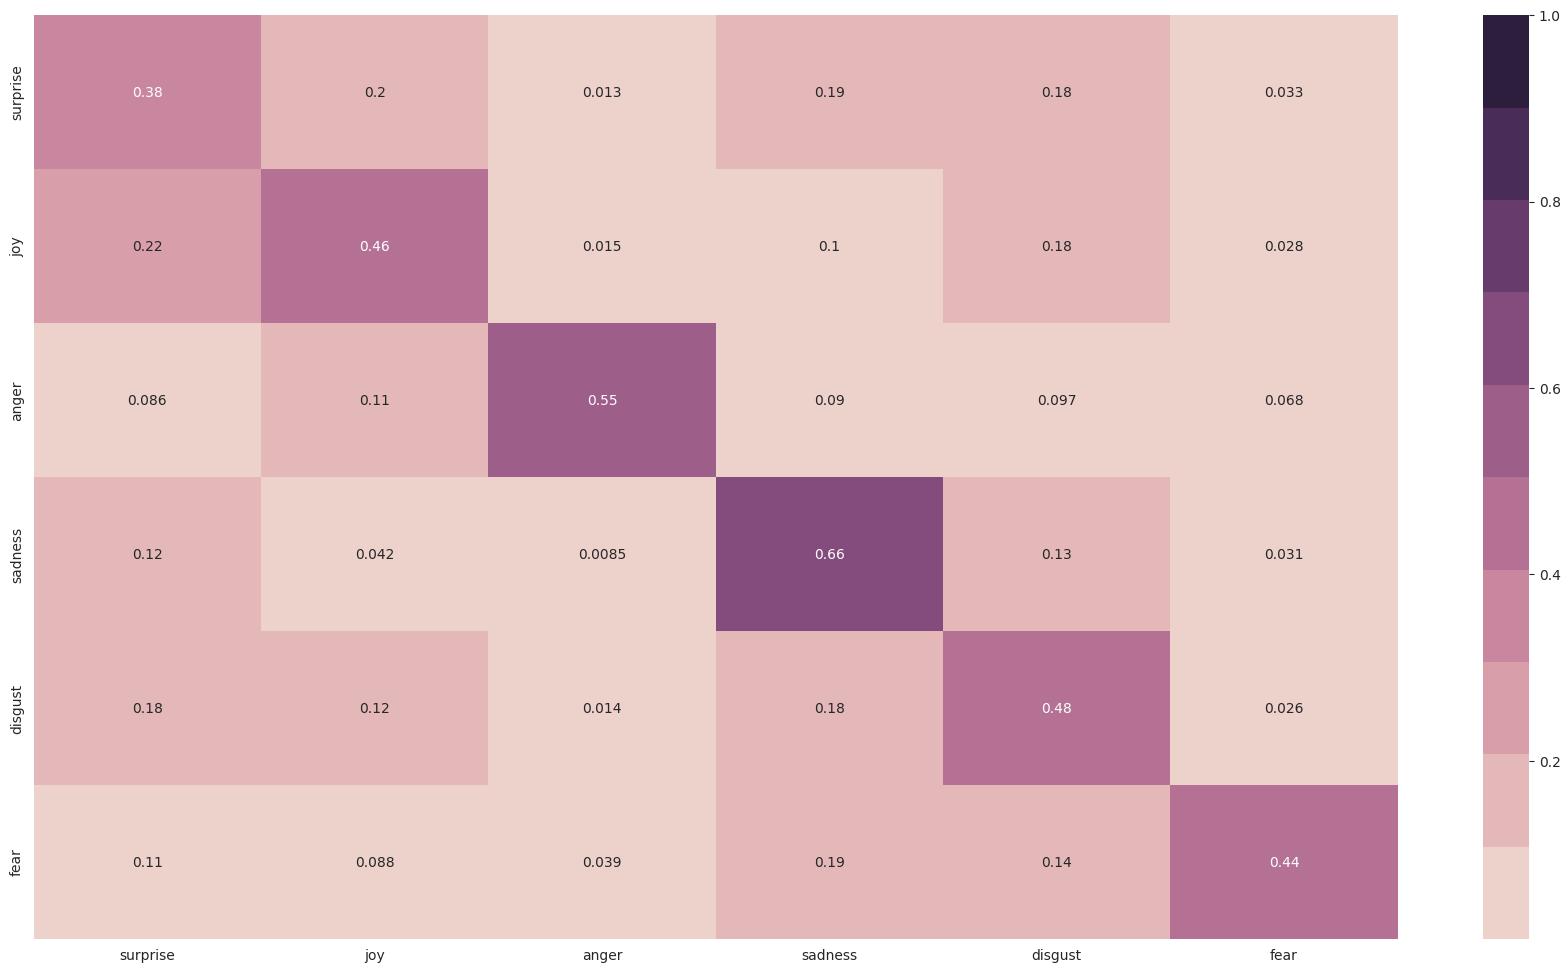

In [32]:
RFclassifer = RandomForestClassifier()
shapas = RFclassifer.fit(X_train, y_train)
y_pred = RFclassifer.predict(X_test)
print('Test set accuracy %s' % accuracy_score(y_test, y_pred))
cr = classification_report(y_test, y_pred, target_names=target_names)
print(cr)

# ------------------------------------------------------------------------------ #

cm = confusion_matrix(y_test, y_pred)
cm = (cm.T / cm.astype(float).sum(axis=1)).T

df_cm = pd.DataFrame(cm, range(len(target_names)), range(len(target_names)))
with sn.axes_style("white"):
    plt.figure(figsize = (22,12))
    ax = sn.heatmap(df_cm, annot=True, xticklabels=target_names, yticklabels=target_names, vmax=1,  cmap=sn.cubehelix_palette(10))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    fig = ax.get_figure()
  